# CARMENES / GTO DATABASE LOADING AND INSPECTION
**Purpose:** testing the formula _log(g) = f(g_Sun, M_star, L_star, T_star, T_Sun)_ for GTO objects

## Introduction

In a previous Notebook we obtained a synthetic stellar population from _BaSTI_ tool (http://basti-iac.oa-abruzzo.inaf.it/syncmd.html) as a reference to locate the D-burning and He3-burning instability bands and GTO objetcs.

However, the values for _log(g)_ for such population were calculated, as it is not a value directly returned by _BaSTI_ tool. The formula used for this calculation was:

$$\log_{10}\left(g_{star}\right)=\log_{10}\left(g_{Sun}\frac{M_{star}}{M_{Sun}}{\frac{R_{Sun}}{R_{star}}}^2\right)=\log_{10}\left(g_{Sun}\right)+\log_{10}\left(\frac{M_{star}}{M_{Sun}}\right)-\log_{10}\left(\frac{L_{star}}{L_{Sun}}\right)+4\log_{10}\left(T_{star}\right)-4\log_{10}\left(T_{Sun}\right)$$

We suspect that the calculation is not valid for low temperature, low luminosity stars, as the synthetic Hertzsprung-Russell diagram we obtained seems to have a strange behaviour in its lower right area. This area is shown in the next figure.

![Suspect bad log(g) calculation](./img/ETL_15_01_Possible_area_wrong_logg.png)

We will now do the same _log(g)_ calculation for the CARMENES objects (which are in the same area), and compare with the values supplied in the table itself.

## Modules and configuration

### Modules

In [1]:
# Modules import:
import numpy as np

import pandas as pd
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})
#sns.set_style("whitegrid")
#sns.set(rc={'figure.figsize':(15,8)})

### Configuration

In [2]:
# Configuration:
# Files:
INPUT_FILE = "../data/carmencita.102_mod.csv" # CARMENES input file
SYNTH_POP_FILE = "../data/Auxiliary_data/Synthetic_Star_Population.csv"

# CONSTANTS (DO NOT CHANGE)
#LOGG_SUN = 2.438694 # log10(274.596 m/s^2)
# THIS IS INCORRECT, SHOULD BE 'LOGG_SUN=log10(27459.6 cm/s^2)=4.438694 (SEE SUMMARY, BELOW)
LOGG_SUN = 4.438694 # log10(274.596 m/s^2) ### CORRECTED VALUE log10(27459.6 cm/s^2)
TEFF_SUN = 5785 # K

### Functions

In [3]:
def logg_star(logg_Sun, Teff_Sun, m_star_in_suns, log_L_star_in_suns, log_Teff_star):
    '''Calculates the log(g) of a star from other parameters of the star and the Sun's (refernce) values'''
    return logg_Sun + np.log10(m_star_in_suns) - log_L_star_in_suns + 4.0 * log_Teff_star - 4.0 * np.log10(Teff_Sun)
vector_logg_star = np.vectorize(logg_star)

## Data loading

### Load CARMENES data

In [4]:
carmenes = pd.read_csv(INPUT_FILE, sep=',', decimal='.')
carmenes.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,Teff_max_K,logg_min,logg_max,is_GTO,rv_file,lc_file,has_rv,has_lc,InstBand_nominal,InstBand_ranged
0,J23598+477,LP 149-014,-,4385,359.962056,47.761478,23:59:49.51,+47:45:44.5,114.027674,-14.216353,...,3050.0,4.50,5.50,False,NaN,NaN,False,False,none,none
1,J23590+208,G 129-051,-,NaN,359.753066,20.860336,23:59:00.42,+20:51:39.0,106.785616,-40.361996,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none
2,J23587+467,BD+45 4378 AB,AB,913,359.685432,46.729152,23:58:43.49,+46:43:44.7,113.616244,-15.187224,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none
3,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,3516.0,4.89,5.05,True,../data/CARMENES_GTO_RVsJ23585+076.dat,NaN,True,False,He3-burning,He3-burning
4,J23582-174,LP 764-040,AB,NaN,359.558095,-17.409041,23:58:13.69,-17:24:32.9,68.527865,-74.336758,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none


In [5]:
print(carmenes.columns.tolist())

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

## Calculations, add calculated value for _log(g)_

In [6]:
carmenes.columns

Index(['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg',
       'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg',
       ...
       'Teff_max_K', 'logg_min', 'logg_max', 'is_GTO', 'rv_file', 'lc_file',
       'has_rv', 'has_lc', 'InstBand_nominal', 'InstBand_ranged'],
      dtype='object', length=186)

In [7]:
carmenes['Calculated_logg'] = -4.0 * np.log10(TEFF_SUN)
carmenes['Calculated_logg'] = carmenes['Calculated_logg'] + 4.0 * np.log10(carmenes['Teff_K'])
carmenes['Calculated_logg'] = carmenes['Calculated_logg'] - np.log10(carmenes['L_Lsol'])
carmenes['Calculated_logg'] = carmenes['Calculated_logg'] + np.log10(carmenes['M_Msol'])
carmenes['Calculated_logg'] = carmenes['Calculated_logg'] + LOGG_SUN
carmenes.head()                                                                     

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,logg_min,logg_max,is_GTO,rv_file,lc_file,has_rv,has_lc,InstBand_nominal,InstBand_ranged,Calculated_logg
0,J23598+477,LP 149-014,-,4385,359.962056,47.761478,23:59:49.51,+47:45:44.5,114.027674,-14.216353,...,4.50,5.50,False,NaN,NaN,False,False,none,none,5.166274
1,J23590+208,G 129-051,-,NaN,359.753066,20.860336,23:59:00.42,+20:51:39.0,106.785616,-40.361996,...,NaN,NaN,False,NaN,NaN,False,False,none,none,NaN
2,J23587+467,BD+45 4378 AB,AB,913,359.685432,46.729152,23:58:43.49,+46:43:44.7,113.616244,-15.187224,...,NaN,NaN,False,NaN,NaN,False,False,none,none,NaN
3,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,4.89,5.05,True,../data/CARMENES_GTO_RVsJ23585+076.dat,NaN,True,False,He3-burning,He3-burning,4.767393
4,J23582-174,LP 764-040,AB,NaN,359.558095,-17.409041,23:58:13.69,-17:24:32.9,68.527865,-74.336758,...,NaN,NaN,False,NaN,NaN,False,False,none,none,NaN


In [8]:
carmenes['diff_logg_percent'] = 100.0 * (carmenes['logg'] - carmenes['Calculated_logg']) / carmenes['logg']

In [9]:
carmenes[['logg', 'Calculated_logg', 'diff_logg_percent']].describe()

,logg,Calculated_logg,diff_logg_percent
count,1652.000000,1647.000000,1642.000000
mean,4.978553,4.837304,2.420557
std,0.355109,0.173267,7.303602
min,4.000000,4.466193,-33.878976
25%,4.687500,4.706210,-3.078603
50%,5.000000,4.810775,3.381576
75%,5.140000,4.947494,7.410272
max,5.500000,5.388942,18.796488


At a first glance, it clearly seems that our calculation dramatically underestimates the values of _log(g)_.

For tabulated values of $log(g) \in [4.0, 5.5]$, calculations yields a range of $log(g) \in [2.5, 3.4]$

**Observation:** These ranges could perfectly explain the apparently wrong upwards _tail_ in the HR diagram of our initial image.

## Data visualization

### Calculated vs tabulated data

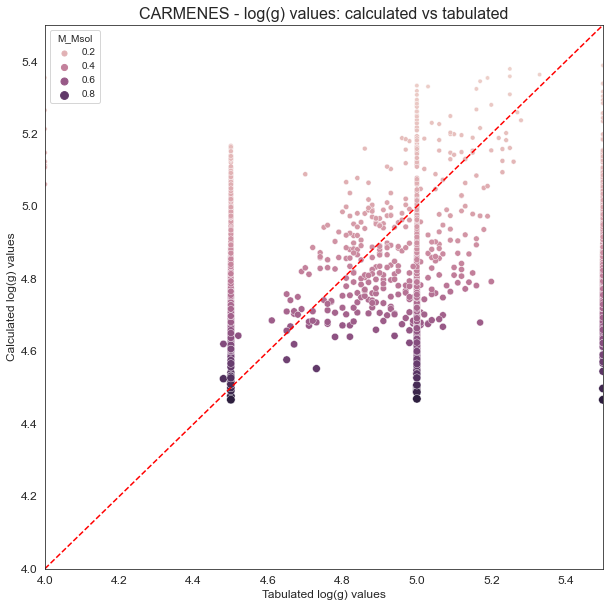

In [10]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=carmenes, x='logg', y='Calculated_logg', s=2, size='M_Msol', hue='M_Msol')
# Set plot limits as per global CARMENES data values.
min_logg = min(carmenes['logg'].min(), carmenes['Calculated_logg'].min())
max_logg = max(carmenes['logg'].max(), carmenes['Calculated_logg'].max())
ax.set_xlim((min_logg, max_logg))
ax.set_ylim((min_logg, max_logg))
# Add and label instability regions:
ax.set_title("CARMENES - log(g) values: calculated vs tabulated", fontsize=16)
ax.set_xlabel("Tabulated log(g) values", fontsize=12)
ax.set_ylabel("Calculated log(g) values", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.plot([min_logg, max_logg], [min_logg, max_logg], 'r--')
#plt.legend(title="GTO objects in instability band", title_fontsize='large',
#           loc='best', fontsize=12)
#plt.savefig(IMAGE_NOMINAL_OUT)
plt.show();

**PRE-CORRECTION:**

Again, we can see that the _log(g)_ calculation clearly underestimates the tabulated values, and that there could be certain dependence with other parameters.

For example, for stars with low mass the calculation seems to be moreaccurate. This can cast doubts on the rest of the synthetic population, even though its shape seems to be fine.

**POST-CORRECTION:**

Ok, the values are nearer the diagonal line, although not still perfectly aligned. However, as this calculation is just for reference purposes in the HR diagram, it does not matter if it is not 100% correct.

### Dependence of error percentage with other variables

In [11]:
print(carmenes.columns.to_list())

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

In [12]:
main_magnitudes = ['Teff_K', 'logg', '[Fe/H]', 'L_Lsol', 'R_Rsol', 'M_Msol', 'diff_logg_percent']

<Figure size 720x720 with 0 Axes>

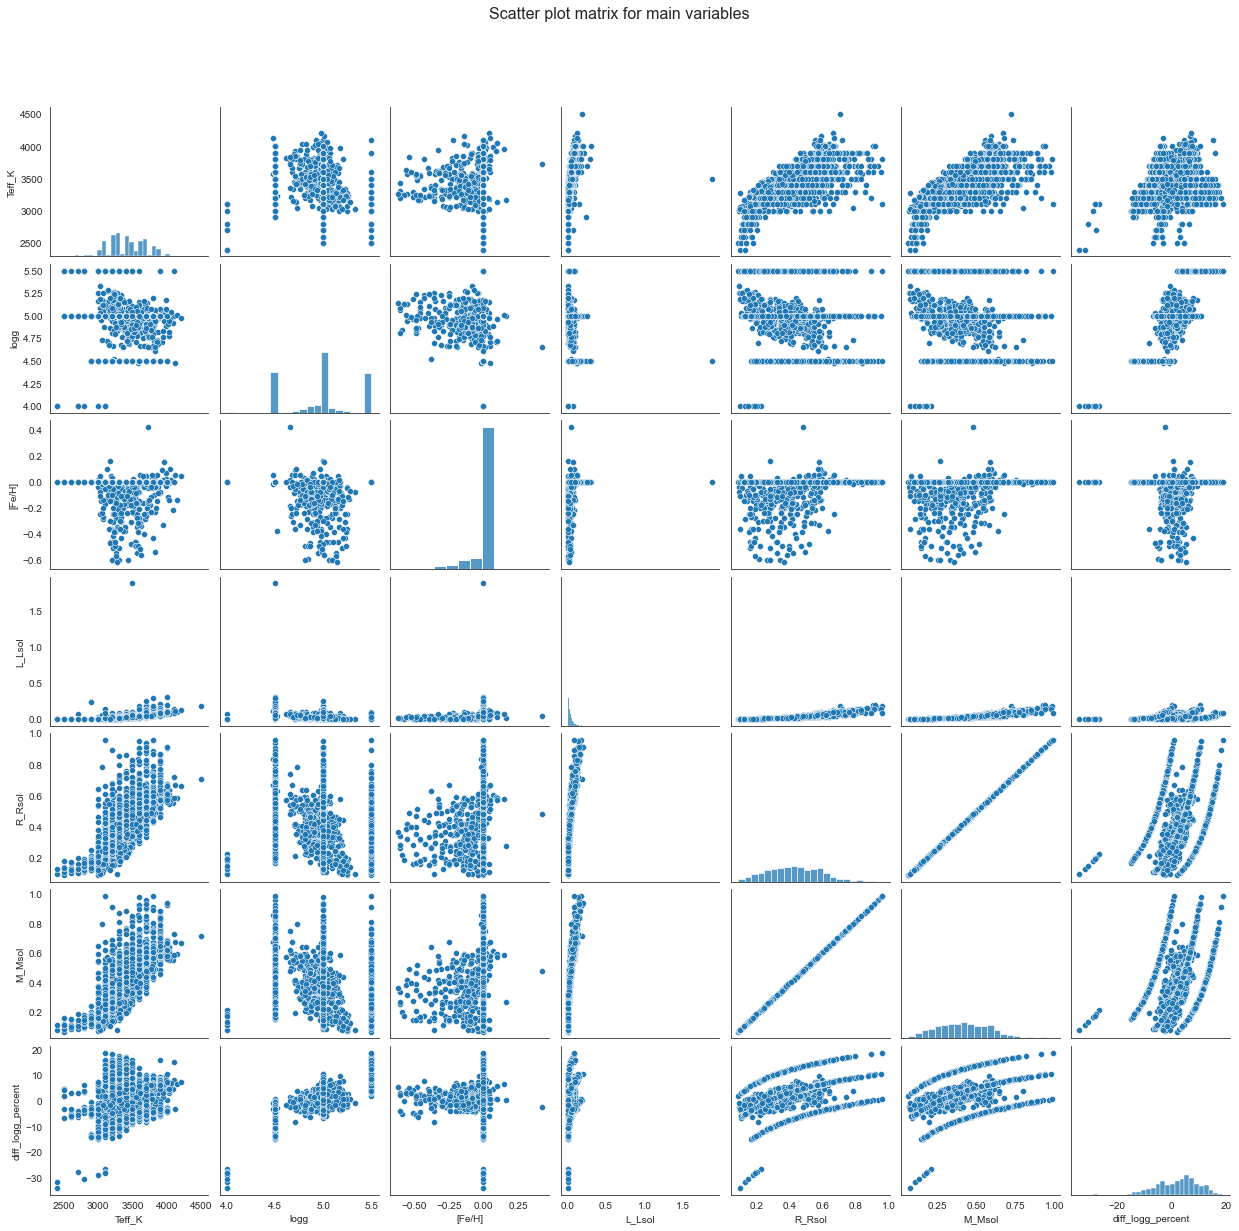

In [13]:
plt.figure(figsize=(10,10))
ax = sns.pairplot(carmenes[main_magnitudes])
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Scatter plot matrix for main variables", fontsize=16)
plt.plot();

Not easy to see a clear relation between the main variables with the error.

There could be certain relationship, specially with `R_Rsol` and `M_Msol`variables. The correlation with `Teff_K` variable also seems to show a slight upwards trend.

We can see, though, that the error is around $30\%-50\%$.

### A closer look to the stellar population

In [14]:
# load the stellar population data:
stellar_pop = pd.read_csv(SYNTH_POP_FILE, sep=',', decimal='.')
stellar_pop.head()

,star_number,log(t[years]),Metallicity[Fe/H],Mass[Mo],log(L/Lo),log(Teff[K]),InitMassSec[Mo],VarStarIdx,Pulsating_log(P[days]),u,...,g-r,r-i,i-z,log_g,Teff,Age [Gyr],Age Range [Gyr],ID Age Range,Metallicity Range [Fe/H],ID Metallicity Range
0,1,9.924415,-1.4575,0.1090,-2.8361,3.5084,0.0928,0,99.99,18.0943,...,1.8538,0.8023,0.4662,3.296607,3224.036872,8.402622,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1
1,2,9.947005,-1.2202,0.1081,-2.8307,3.5138,0.0867,0,99.99,17.9405,...,1.8141,0.7850,0.4546,3.309206,3264.374675,8.851255,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1
2,4,9.913869,-0.7478,0.2711,-1.8518,3.5874,0.2057,0,99.99,13.1454,...,1.4078,0.5379,0.3096,3.024010,3867.229981,8.201037,from 7.5 to 10.0 Gyr,Age_3,from -1.0 to -0.5 [Fe/H],Met_2
3,6,9.965860,-1.0048,0.2449,-1.8871,3.5979,0.2222,0,99.99,12.7719,...,1.2943,0.5010,0.2886,3.057169,3961.867984,9.244008,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1
4,8,9.919496,-1.4860,0.1656,-2.2855,3.5691,0.1339,0,99.99,14.7574,...,1.6028,0.6053,0.3360,3.170441,3707.660840,8.308000,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1


In [15]:
stellar_pop.columns

Index(['star_number', 'log(t[years])', 'Metallicity[Fe/H]', 'Mass[Mo]',
       'log(L/Lo)', 'log(Teff[K])', 'InitMassSec[Mo]', 'VarStarIdx',
       'Pulsating_log(P[days])', 'u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i',
       'i-z', 'log_g', 'Teff', 'Age [Gyr]', 'Age Range [Gyr]', 'ID Age Range',
       'Metallicity Range [Fe/H]', 'ID Metallicity Range'],
      dtype='object')

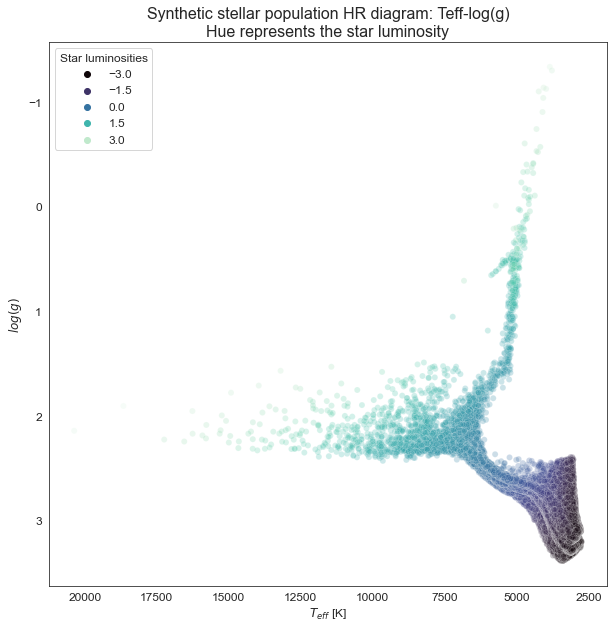

In [16]:
plt.figure(figsize=(10,10))
# Add the synthetic population, with hue according to luminosity.
ax = sns.scatterplot(data=stellar_pop, x='Teff', y='log_g', color='gray',
                     hue='log(L/Lo)', palette=sns.color_palette("mako", as_cmap=True),
                     alpha=0.25)

# Set titles, sizes etc.
ax.set_title("Synthetic stellar population HR diagram: Teff-log(g)\n"
             "Hue represents the star luminosity", fontsize=16)
ax.set_xlabel("$T_{eff}$ [K]", fontsize=12)
ax.set_ylabel("$log(g)$", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.invert_xaxis()
ax.invert_yaxis()
plt.legend(title="Star luminosities", title_fontsize='large',
           loc='best', fontsize=12)
plt.show();

It seems that, in effect, the upwards _tail_ on the right should naturally follow the donw-right direction instead.

We now show the other HR diagram (luminosity - temperature), with the _log(g)_ as the color.

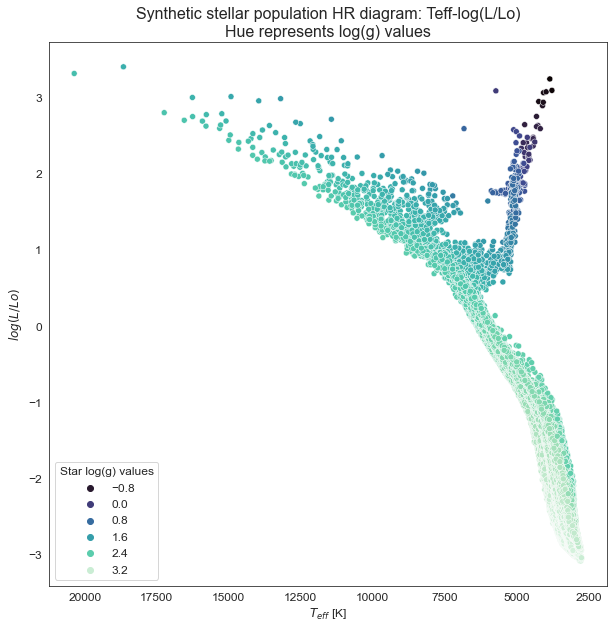

In [17]:
plt.figure(figsize=(10,10))
# Add the synthetic population, with hue according to log(g).
ax = sns.scatterplot(data=stellar_pop, x='Teff', y='log(L/Lo)', color='gray',
                     hue='log_g', palette=sns.color_palette("mako", as_cmap=True),
                     alpha=1.0)

# Set titles, sizes etc.
ax.set_title("Synthetic stellar population HR diagram: Teff-log(L/Lo)\n"
             "Hue represents log(g) values", fontsize=16)
ax.set_xlabel("$T_{eff}$ [K]", fontsize=12)
ax.set_ylabel("$log(L/Lo)$", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.invert_xaxis()
plt.legend(title="Star log(g) values", title_fontsize='large',
           loc='best', fontsize=12)
plt.show();

Let's plot now _log(g)_ against luminosity:

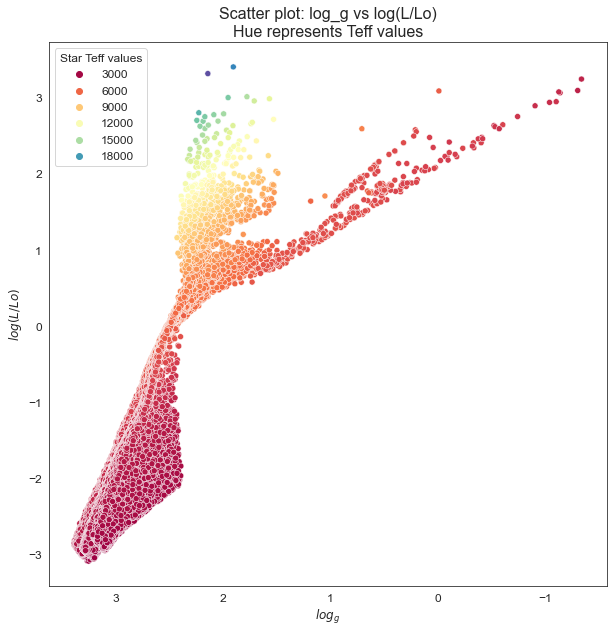

In [18]:
plt.figure(figsize=(10,10))
# Plot log(g) versus luminosity.
ax = sns.scatterplot(data=stellar_pop, x='log_g', y='log(L/Lo)', color='gray',
                     hue='Teff', palette=sns.color_palette("Spectral", as_cmap=True),
                     alpha=1.0)

# Set titles, sizes etc.
ax.set_title("Scatter plot: log_g vs log(L/Lo)\n"
             "Hue represents Teff values", fontsize=16)
ax.set_xlabel("$log_g$", fontsize=12)
ax.set_ylabel("$log(L/Lo)$", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.invert_xaxis()
plt.legend(title="Star Teff values", title_fontsize='large',
           loc='best', fontsize=12)
plt.show();

All graphs seems to show a similar behaviour, but it is difficult to analyse.

## Summary

**OBSERVATIONS AND CONCLUSIONS:**
- The calculation of _log(g)_ does not seem to be accurate for the stars in CARMENES database, yielding errors of $30\% - 50\%$
- Although for the synthetic stars in the main sequence (above certain temperature), giant branches and horizontal branch, the shape seems logical, we cannot be sure about the accuracy of those stars positions in the `logg` vs `Teff_K` HR diagram, either.
- However, as this synthetic population has been added to the image for reference purposes only, it is not so important to further analyze this issue.
- **NOTICED LATER THAN THE $log(g)$ VALUES IN THE DATA ARE $log(g[cm/s^2]$, SO THAT THE CONSTANT `LOGG_SUN` IS INCORRECT, BECAUSE IT WAS CALCULATED OVER $ms^{-2}$.THE CORRECT VALUE IS `LOGG_SUN`=4.438694**
  - **ACTION: CORRECTED `ETL_07_BaSTI_SynthPop_File_Preprocessing_v2.0.ipynb` NOTEBOOK WITH THE PROPER `LOGG_SUN` VALUE.**